# Bees bar chart

In [1]:
%load_ext magic_duckdb

In [2]:
import duckdb

# Open a connection to your DuckDB database
con = duckdb.connect("my-data.duckdb")

In [3]:
%%dql -co con
CREATE TABLE IF NOT EXISTS bees AS SELECT * FROM read_csv('https://raw.githubusercontent.com/MotherDuck-Open-Source/sql-tutorial/main/data/bees.csv');

,Count


In [4]:
%%dql -co con
DESCRIBE bees

,column_name,column_type,null,key,default,extra
0,Bee Year Added,BIGINT,YES,None,None,None
1,Bee Family,VARCHAR,YES,None,None,None
2,Bee Genus,VARCHAR,YES,None,None,None
3,Bee Species,VARCHAR,YES,None,None,None
4,Bee Code,VARCHAR,YES,None,None,None
5,Bee Native?,VARCHAR,YES,None,None,None
6,Plant Family,VARCHAR,YES,None,None,None
7,Plant Genus,VARCHAR,YES,None,None,None
8,Plant Species,VARCHAR,YES,None,None,None
9,Plant Common Name,VARCHAR,YES,None,None,None


In [85]:
%%dql -co con -o df
WITH bee_species_per_plant AS (
    SELECT
        COUNT("Bee Species") as count_bee_species,
        "Bee Native?" as is_bee_native,
        "Plant Common Name" as plant_species
    FROM bees
    WHERE plant_species != '.' AND is_bee_native != '.'
    GROUP BY is_bee_native, plant_species
),

plants_non_native_bees AS (
    SELECT plant_species FROM bee_species_per_plant
    WHERE is_bee_native == 'N'
),

top_plants AS (
    SELECT plant_species FROM bee_species_per_plant
    ORDER BY count_bee_species DESC
    LIMIT 50
)
SELECT count_bee_species, is_bee_native, bee_species_per_plant.plant_species FROM bee_species_per_plant
INNER JOIN plants_non_native_bees ON plants_non_native_bees.plant_species = bee_species_per_plant.plant_species
INNER JOIN top_plants ON top_plants.plant_species = bee_species_per_plant.plant_species
WHERE count_bee_species > 5
ORDER BY count_bee_species DESC

,count_bee_species,is_bee_native,plant_species
0,159,Y,white sweetclover
1,131,Y,common dandelion
2,117,Y,alfalfa
3,106,Y,yellow sweetclover
4,90,Y,curlycup gumweed
5,79,Y,common sunflower
6,78,Y,creosote bush
7,76,Y,garden yellowrocket
8,73,Y,Queen Anne's lace
9,67,Y,common yarrow


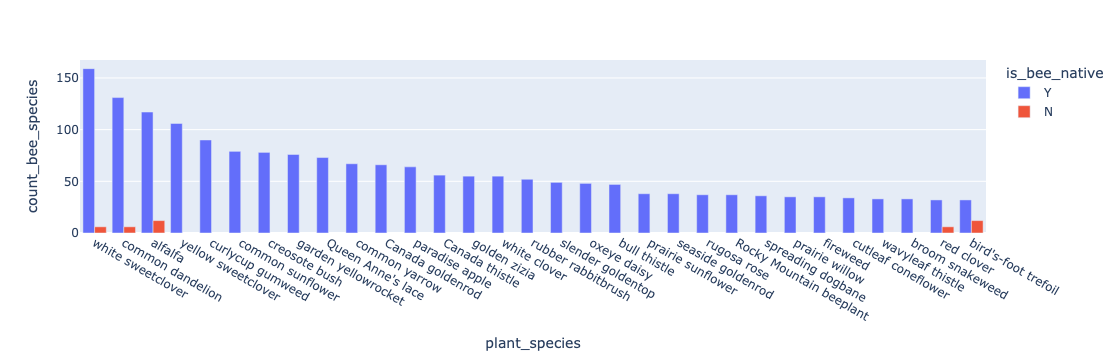

In [86]:
import plotly.express as px
fig = px.bar(df, x="plant_species", y="count_bee_species", color="is_bee_native", barmode="group")
fig.show()

In [87]:
%%dql -co con
CREATE OR REPLACE TABLE top_plants AS
    WITH bee_species_per_plant AS (
        SELECT
            COUNT("Bee Species") as count_bee_species,
            "Bee Native?" as is_bee_native,
            "Plant Common Name" as plant_species
        FROM bees
        WHERE plant_species != '.' AND is_bee_native != '.'
        GROUP BY is_bee_native, plant_species
    ),
    
    plants_non_native_bees AS (
        SELECT plant_species FROM bee_species_per_plant
        WHERE is_bee_native == 'N'
    ),
    
    top_plants AS (
        SELECT plant_species FROM bee_species_per_plant
        ORDER BY count_bee_species DESC
        LIMIT 50
    )
    SELECT count_bee_species, is_bee_native, bee_species_per_plant.plant_species FROM bee_species_per_plant
    INNER JOIN plants_non_native_bees ON plants_non_native_bees.plant_species = bee_species_per_plant.plant_species
    INNER JOIN top_plants ON top_plants.plant_species = bee_species_per_plant.plant_species
    WHERE count_bee_species > 5
    ORDER BY count_bee_species DESC

,Count
0,37


For the summary

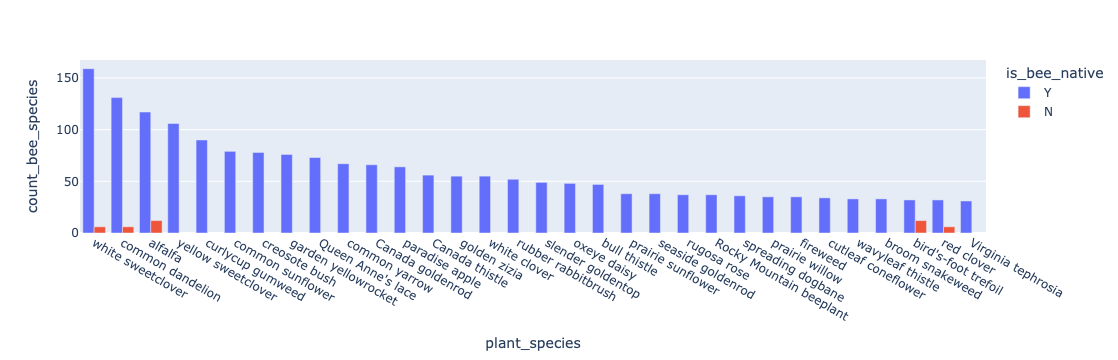

In [89]:
import plotly.express as px
fig = px.bar(con.sql("FROM top_plants").df(), x="plant_species", y="count_bee_species", color="is_bee_native", barmode="group")
fig.show()